In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
df = pd.read_csv("UserQuestionsDataFor_AllQuestions.csv", usecols = ['tags'])

for i in range(len(df.tags)):
    df.tags[i] = df.tags[i][1:-1]
    df.tags[i] = df.tags[i].split(',')
    for j in range(len(df.tags[i])):
        if df.tags[i][j][0] == ' ':
            df.tags[i][j] = df.tags[i][j][1:]

In [98]:
G = nx.Graph()

for i in range(100):
    G.add_node(i, tags = df.tags[i])
        
for i in range(100):
    tags_i = set(df.tags[i])
    for j in range(i+1, 99):
        if len(tags_i.intersection(df.tags[j])) > 0:
            G.add_edge(i,j)
            
#list(G.nodes)    
#list(G.edges)

In [99]:
print("number of edges: ", len(list(G.edges)))
print("number of nodes: ", len(list(G.nodes)))
print("Degrees by nodes: ", G.degree)

number of edges:  196
number of nodes:  100
Degrees by nodes:  [(0, 13), (1, 0), (2, 0), (3, 4), (4, 6), (5, 0), (6, 3), (7, 4), (8, 1), (9, 8), (10, 8), (11, 0), (12, 7), (13, 3), (14, 2), (15, 13), (16, 5), (17, 0), (18, 0), (19, 2), (20, 16), (21, 2), (22, 7), (23, 4), (24, 8), (25, 2), (26, 0), (27, 13), (28, 1), (29, 2), (30, 0), (31, 7), (32, 1), (33, 0), (34, 3), (35, 0), (36, 3), (37, 1), (38, 8), (39, 13), (40, 0), (41, 14), (42, 0), (43, 0), (44, 8), (45, 8), (46, 1), (47, 2), (48, 3), (49, 13), (50, 0), (51, 0), (52, 0), (53, 5), (54, 0), (55, 1), (56, 13), (57, 1), (58, 5), (59, 0), (60, 0), (61, 1), (62, 1), (63, 1), (64, 1), (65, 0), (66, 5), (67, 2), (68, 0), (69, 0), (70, 0), (71, 0), (72, 14), (73, 14), (74, 13), (75, 1), (76, 4), (77, 0), (78, 0), (79, 13), (80, 1), (81, 7), (82, 4), (83, 4), (84, 3), (85, 13), (86, 0), (87, 13), (88, 4), (89, 0), (90, 8), (91, 5), (92, 0), (93, 2), (94, 8), (95, 0), (96, 0), (97, 4), (98, 2), (99, 0)]


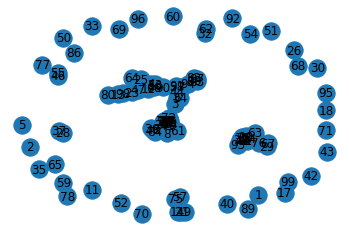

In [100]:
subax1 = plt.subplot(111)
nx.draw(G, with_labels=True)

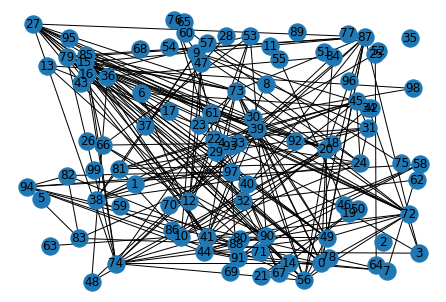

In [101]:
nx.draw_random(G, with_labels=True)

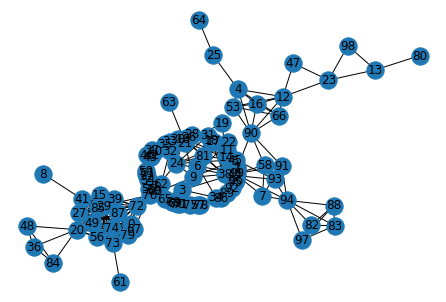

In [102]:
nx.draw_kamada_kawai(G, with_labels=True)

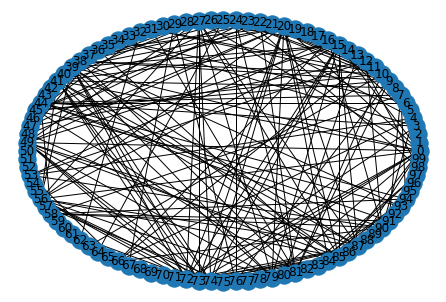

In [103]:
nx.draw_shell(G, with_labels=True)

<BarContainer object of 12 artists>

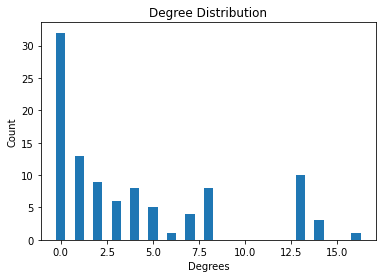

In [116]:
dic_degree={}
for i in range(len(G.degree)):
    dic_degree[i] = G.degree[i]  


dic_degrees_sum = {}
for j in range(100):
    num_edges = dic_degree[j]
    if num_edges in dic_degrees_sum:
        dic_degrees_sum[num_edges]+=1
    else:
        dic_degrees_sum[num_edges] = 1
        
plt.title('Degree Distribution')
plt.xlabel('Degrees')
plt.ylabel('Count')
plt.bar(dic_degrees_sum.keys(), dic_degrees_sum.values(),0.5)

<BarContainer object of 14 artists>

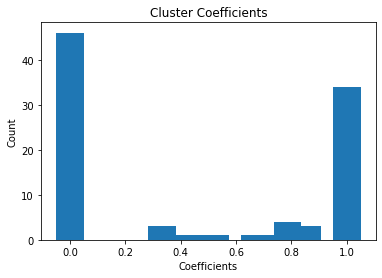

In [115]:
dic_cluster_coef = nx.clustering(G)

dic_cluster_coef_sum = {}
for j in range(100):
    edge_coef = dic_cluster_coef[j]
    if edge_coef in dic_cluster_coef_sum:
        dic_cluster_coef_sum[edge_coef]+=1
    else:
        dic_cluster_coef_sum[edge_coef] = 1

plt.title('Cluster Coefficients')
plt.xlabel('Coefficients')
plt.ylabel('Count')        
plt.bar(dic_cluster_coef_sum.keys(), dic_cluster_coef_sum.values(), 0.1)

<BarContainer object of 33 artists>

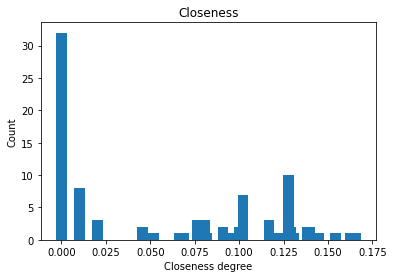

In [114]:
dic_closeness = nx.closeness_centrality(G)

dic_closeness_sum = {}
for j in range(100):
    num_closeness = dic_closeness[j]
    if num_closeness in dic_closeness_sum:
        dic_closeness_sum[num_closeness]+=1
    else:
        dic_closeness_sum[num_closeness] = 1
        
plt.title('Closeness')
plt.xlabel('Closeness degree')
plt.ylabel('Count')
plt.bar(dic_closeness_sum.keys(), dic_closeness_sum.values(), 0.006)

<BarContainer object of 15 artists>

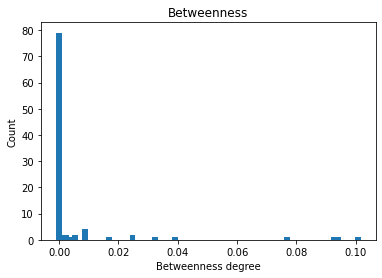

In [113]:
dic_betweenness = nx.betweenness_centrality(G)

dic_betweenness_sum = {}
for j in range(100):
    num_betweenness = dic_betweenness[j]
    if num_betweenness in dic_betweenness_sum:
        dic_betweenness_sum[num_betweenness]+=1
    else:
        dic_betweenness_sum[num_betweenness] = 1     

plt.title('Betweenness')
plt.xlabel('Betweenness degree')
plt.ylabel('Count')
plt.bar(dic_betweenness_sum.keys(), dic_betweenness_sum.values(), 0.002)